In [160]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [161]:
dataset = load_dataset("mnist")
train_data = dataset["train"] #loads the train part of the data set into train_data list in which the data is of the type['image', 'label']

In [162]:
train_data_labels = [] # initializes an empty list
for i in range(10):
    train_data_labels.append([]) #makes the list a 2d list to store 100 images corresponding to each label
for data_point in train_data:
    image = data_point['image']
    label = data_point['label']
    if len(train_data_labels[label])<100:
        train_data_labels[label].append(np.array(image).flatten()) #makes the 28x28 image matrix to a list of list 784 and appends 
                                                                    #it to the list of corresponding label

initial_data = np.array([train_data_labels[label][pics] for label in range(10) for pics in range(100)]) #converts the the list into an np array of dimensions 1000x784 (i.e n X d)
initial_data = initial_data.transpose() #makes the X matrix d X n
initial_data = np.array(initial_data, dtype='float64')
print(initial_data.shape)

(784, 1000)


In [163]:
# Centering the data
d = initial_data.shape[0]
n = initial_data.shape[1]
mu = np.zeros((d, 1))
centered_data = np.zeros((784, 1000))
for i in range(d):
    for j in range(n):
        mu[i] = mu[i]+initial_data[i][j]
mu = mu/n
for i in range(d):
    for j in range(n):
        centered_data[i][j] = initial_data[i][j] -mu[i]

In [164]:
#Eigen Vector Calculation
covariance_mat = np.matmul(centered_data, centered_data.transpose(), dtype = 'float64')
covariance_mat = covariance_mat/n
for i in range(d):
    covariance_mat[i][i] = covariance_mat[i][i] + 0.000001
eigen_values, eigen_vectors = np.linalg.eigh(covariance_mat)
eigen_values = eigen_values[::-1]
eigen_vectors = eigen_vectors[:,::-1]
eig_sum = np.sum(eigen_values)

# Part 1 of the question

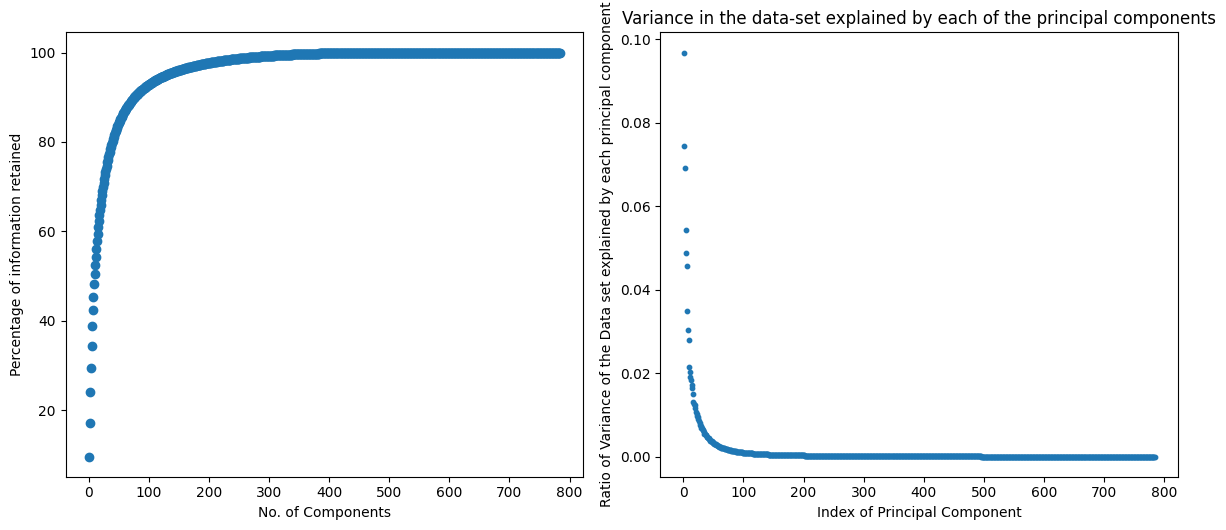

In [165]:
eig_sum_comp = 0.0
variance_percentage = np.zeros(784)
for i in range(d):
    eig_sum_comp += eigen_values[i]
    variance_percentage[i] = (eig_sum_comp/eig_sum)*100
x_indices = np.arange(len(eigen_values))+1
fig, axes = plt.subplots(1, 2, figsize=(12, 5.4))
axes[0].scatter(x_indices, variance_percentage)
axes[0].set_xlabel('No. of Components')
axes[0].set_ylabel('Percentage of information retained')
axes[1].scatter(x_indices, eigen_values/eig_sum, s=10)
axes[1].set_xlabel('Index of Principal Component')
axes[1].set_ylabel('Ratio of Variance of the Data set explained by each principal component')
axes[1].set_title('Variance in the data-set explained by each of the principal components')
plt.tight_layout()
plt.show()

The below images are the top 10 principal components obtained by running the PCA algorithm

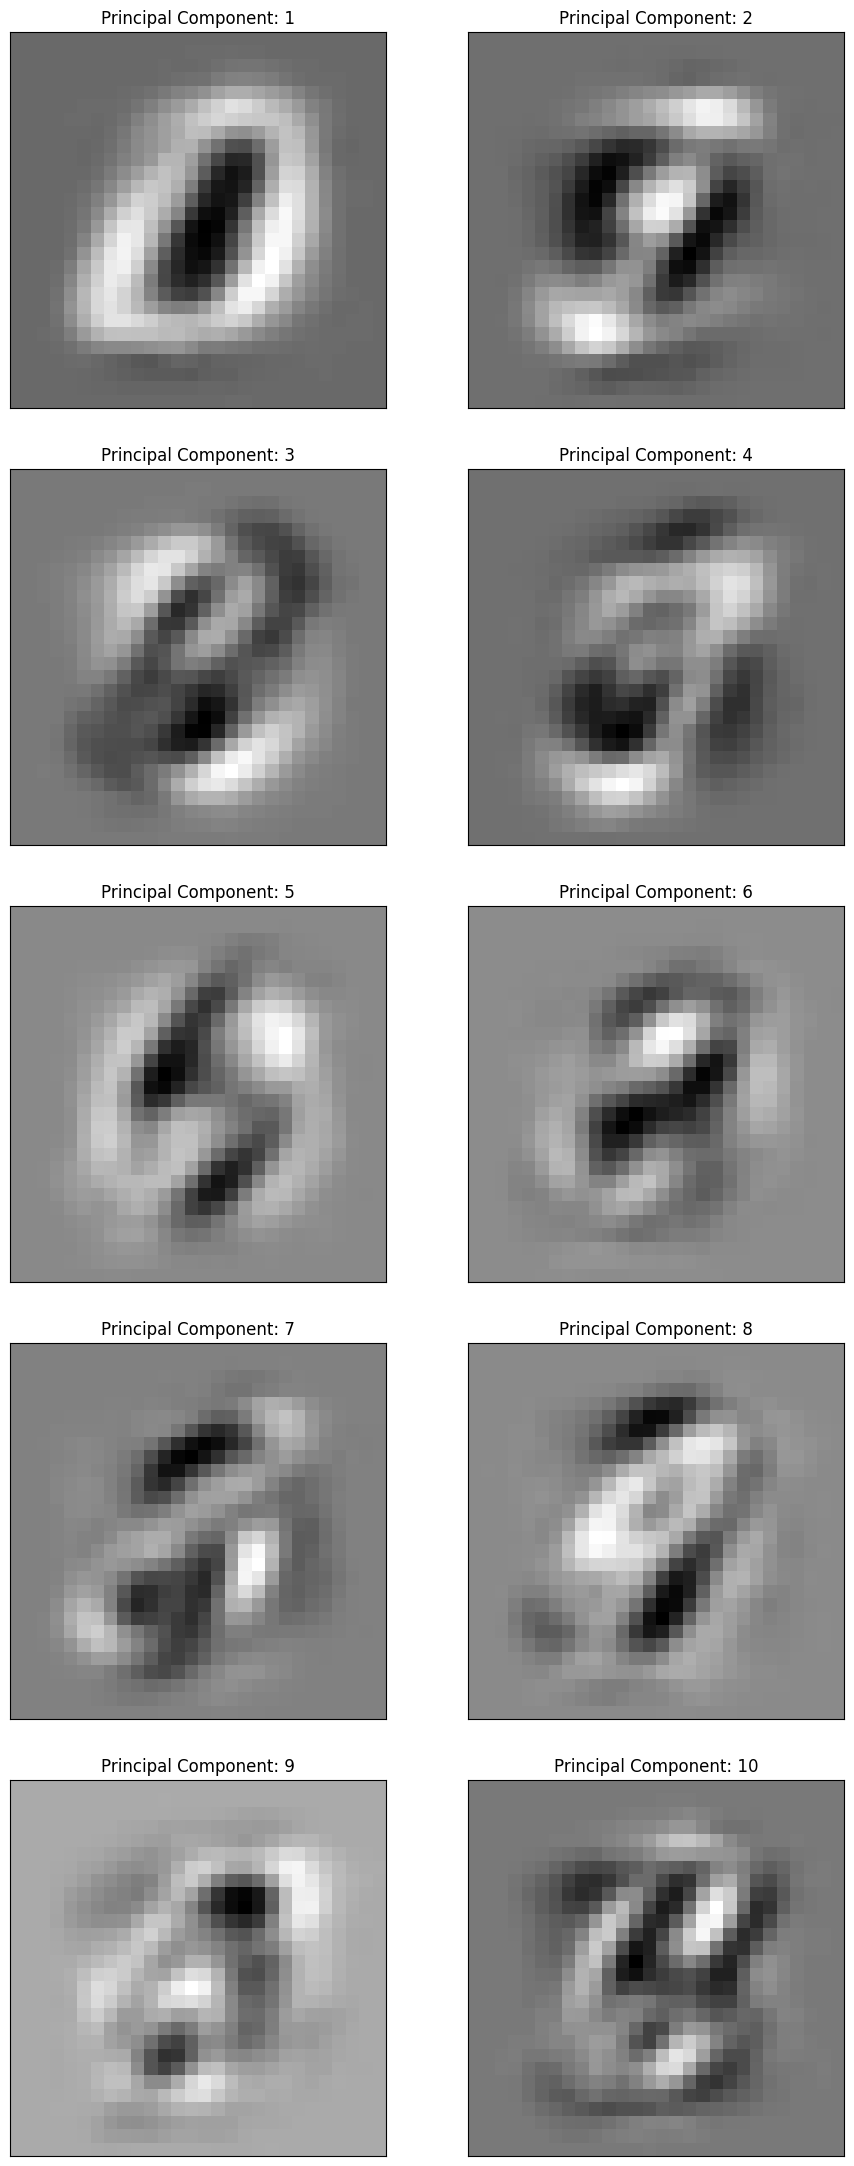

In [166]:
figs, axes = plt.subplots(5, 2, figsize = (10, 22))
figs.subplots_adjust(wspace=0)
for i in range(10):
    axes[int(i/2), i%2].imshow(eigen_vectors[:,i].reshape(28, 28), cmap='gray')
    axes[int(i/2), i%2].set_title(f'Principal Component: {i+1}')
plt.tight_layout()
for axs in axes.flat:
    axs.set_xticks([])
    axs.set_yticks([])
plt.show()

# Part 2 of the Question

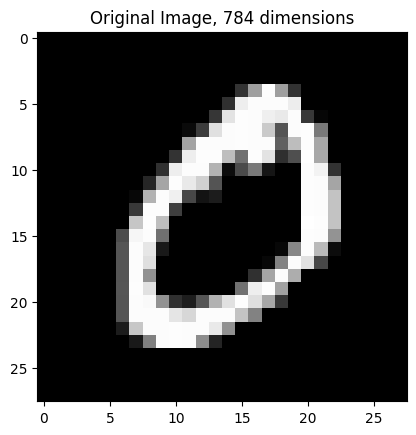

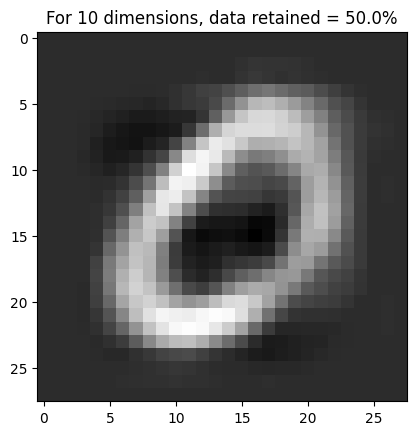

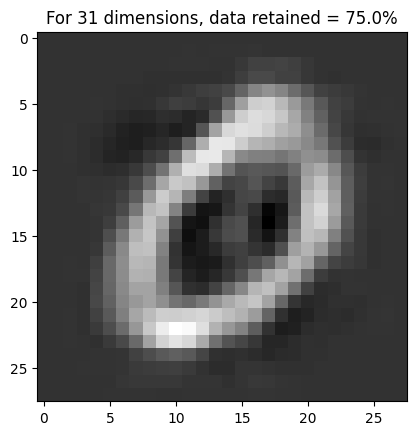

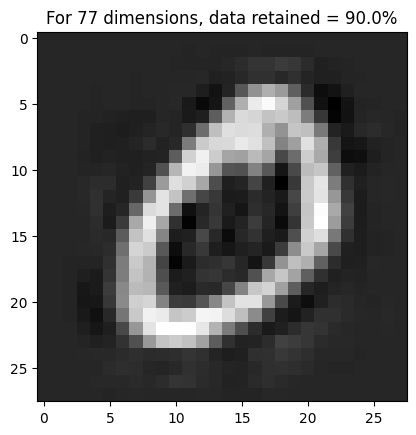

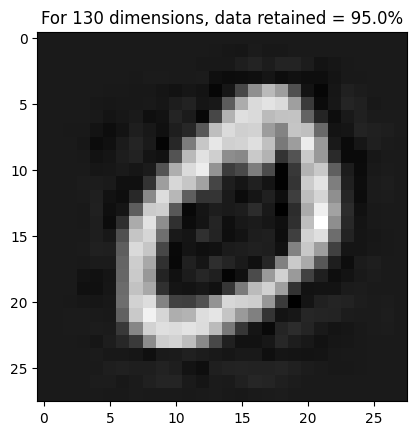

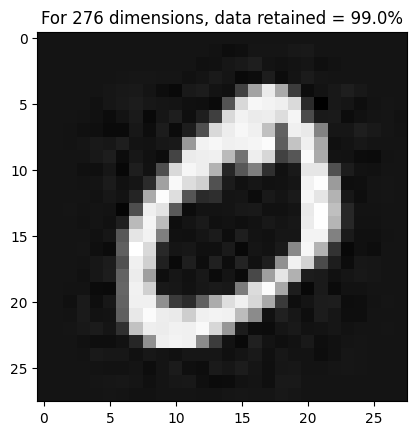

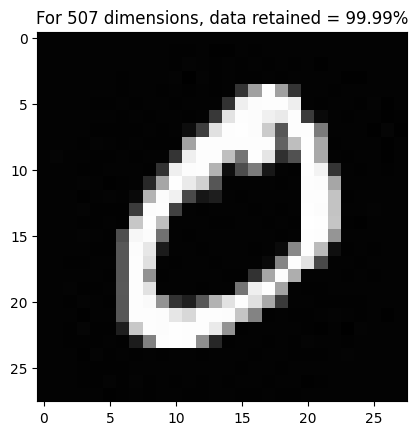

In [167]:
# Change the below ratio for more accurate or less accurate results
plt.imshow(initial_data[:,0].reshape(28, 28), cmap='gray')
plt.gca().set_title('Original Image, 784 dimensions')
plt.show()
for ratio_of_information_to_be_retained in [0.5, 0.75, 0.9, 0.95, 0.99, 0.9999]:
    D=0
    eig_sum_comp = 0.0
    for i in range(d):
        if (eig_sum_comp/eig_sum <= ratio_of_information_to_be_retained):
            eig_sum_comp += eigen_values[i]
            D=i+1
        else: break
    # Reconstruction of the Data
    after_pca_centered = np.zeros((1000, 784))
    for i in range (n):
        for j in range(D):
            after_pca_centered[i]+=np.matmul(eigen_vectors[:,j], centered_data[:,i], dtype='float64')*eigen_vectors[:,j]
    after_pca = np.add(after_pca_centered, mu.T, dtype='float64')
    plt.gca().set_title(f'For {D} dimensions, data retained = {ratio_of_information_to_be_retained*100}%')
    plt.imshow(after_pca[0].reshape(28, 28), cmap='gray')
    plt.show()

In [168]:
def error_calc(data, z_assignment, means = 0):
    error = 0.0
    if(means==0):
        l = np.max(z_assignment)+1
        D = data[:,0].size
        means = np.full((l, 2), 0.0, dtype='float64')
        count = np.zeros(l).astype(int)
        for i in range(data[0].size):
            means[z_assignment[i]] += data[:,i]
            count[z_assignment[i]] += 1
        for i in range(l): means[i] = means[i]/count[i]
    for i in range(data[0].size):
        error+=np.linalg.norm(data[:,i]-means[z_assignment[i]])
    return error

# Part 3 of the question

## Polynomial Kernel

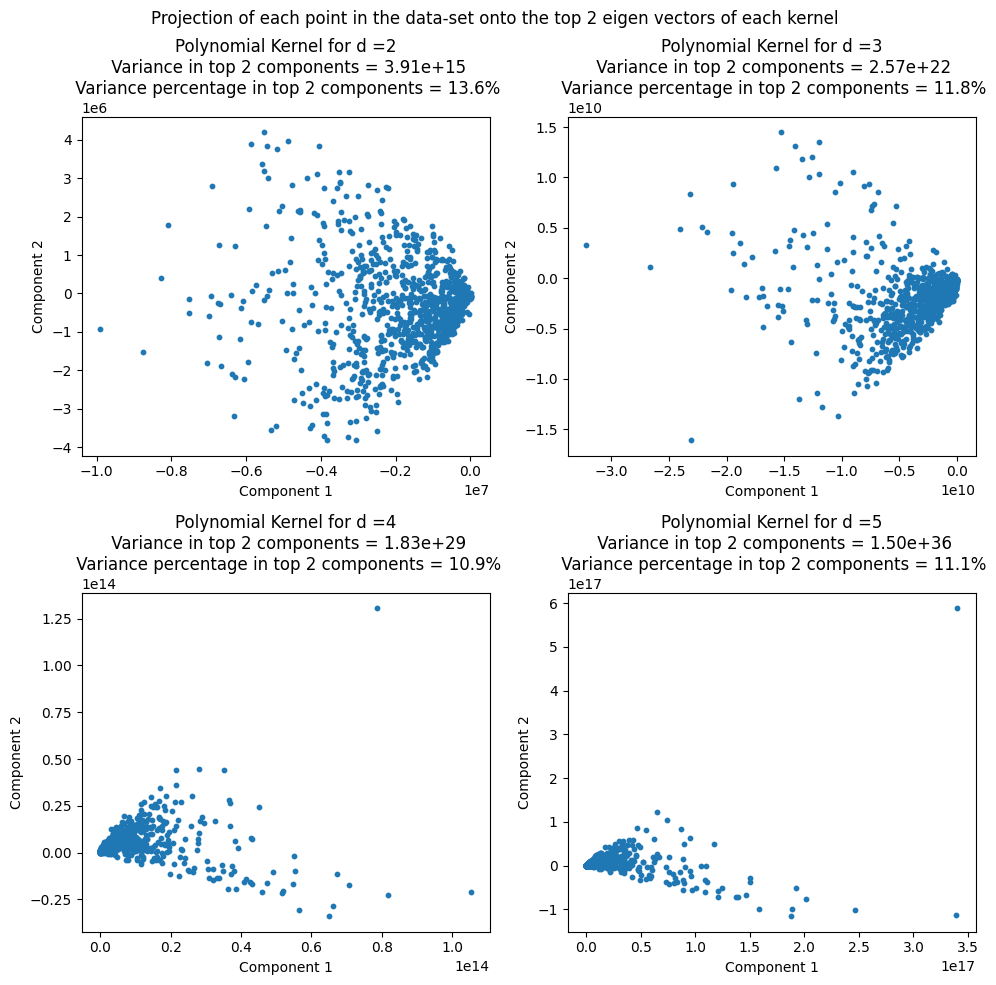

In [169]:
def Kernel1(arr1, arr2, pwr):
    result = (1+ np.matmul(arr1.T, arr2, dtype='float64'))**pwr
    return result
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
for pwr in [2, 3, 4, 5]:
    kernel_mat = np.zeros((n, n))
    kernel_mat = (1 + np.matmul(initial_data.transpose(), initial_data, dtype='float64'))**pwr
    
    centering_const = np.sum(kernel_mat, dtype='float64')/(n*n)
    kernel_product_mat = np.zeros((n, n))
    
    row_sum_mat = np.sum(kernel_mat, axis=1, dtype='float64')/n
    row_sum_mat = row_sum_mat.reshape(-1, 1)
    col_sum_mat = np.sum(kernel_mat, axis=0, dtype = 'float64')/n
    kernel_product_mat = kernel_mat - row_sum_mat - col_sum_mat + centering_const
    eigen_values_kernel1, eigen_vectors_kernel1 = np.linalg.eigh(kernel_product_mat)
    eigen_values_kernel1 = eigen_values_kernel1[::-1]
    eigen_vectors_kernel1 = eigen_vectors_kernel1[:,::-1]
    eigenval_sum = np.sum(eigen_values_kernel1, dtype='float64')
    projections = np.zeros((n, 2))
    for i in range(n):
        projections[i][0] = np.matmul(eigen_vectors_kernel1[:,0], kernel_mat[i], dtype='float64')/(eigen_values_kernel1[0])**0.5
        projections[i][1] = np.matmul(eigen_vectors_kernel1[:,1], kernel_mat[i], dtype='float64')/(eigen_values_kernel1[1])**0.5
    axes[int((pwr-2)/2), (pwr-2)%2].scatter(projections[:,0], projections[:,1], s=10)
    axes[int((pwr-2)/2), (pwr-2)%2].set_title(f'Polynomial Kernel for d ={pwr}\n Variance in top 2 components = {(eigen_values_kernel1[0]+eigen_values_kernel1[1]):.2e}\n Variance percentage in top 2 components = {((eigen_values_kernel1[0]+eigen_values_kernel1[1])*100/eigenval_sum):.1f}%')
    axes[int((pwr-2)/2), (pwr-2)%2].set_xlabel('Component 1')
    axes[int((pwr-2)/2), (pwr-2)%2].set_ylabel('Component 2')

fig.suptitle('Projection of each point in the data-set onto the top 2 eigen vectors of each kernel')
plt.tight_layout()
plt.show()

## Radial Kernel

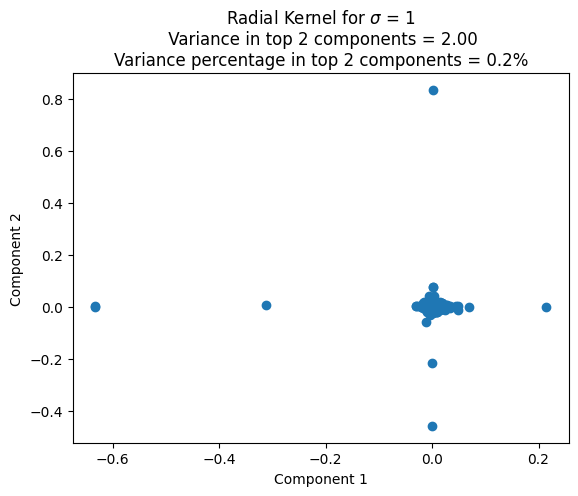

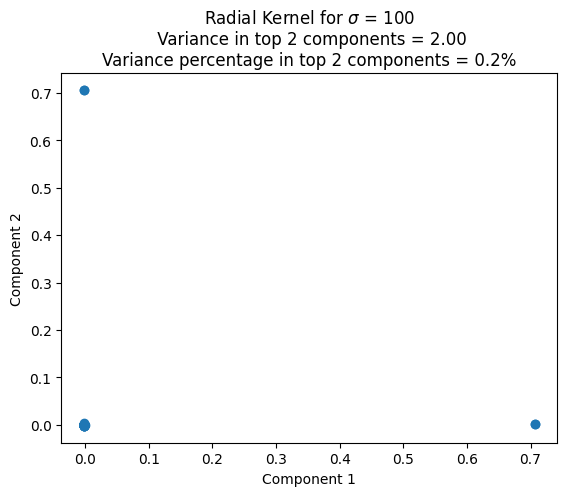

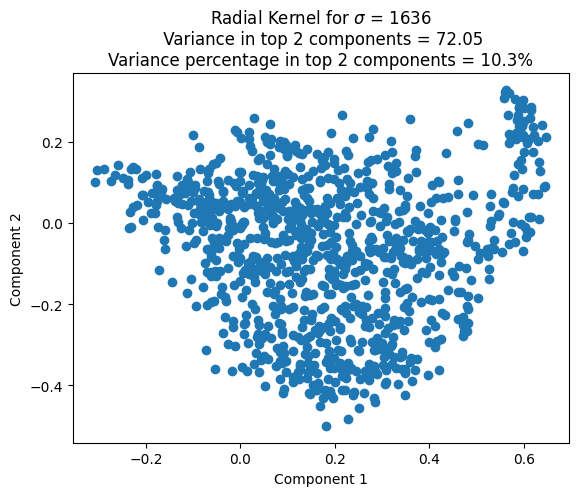

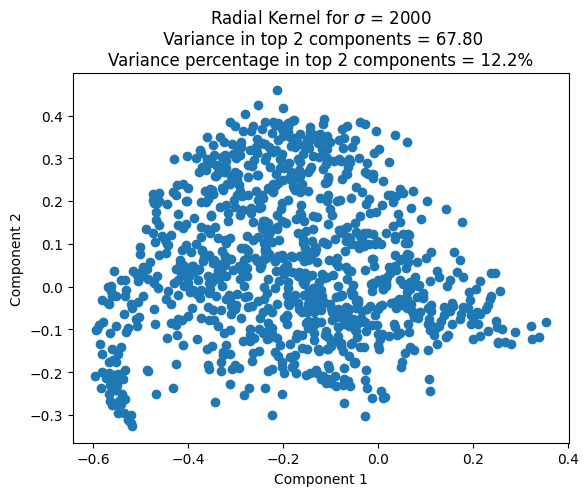

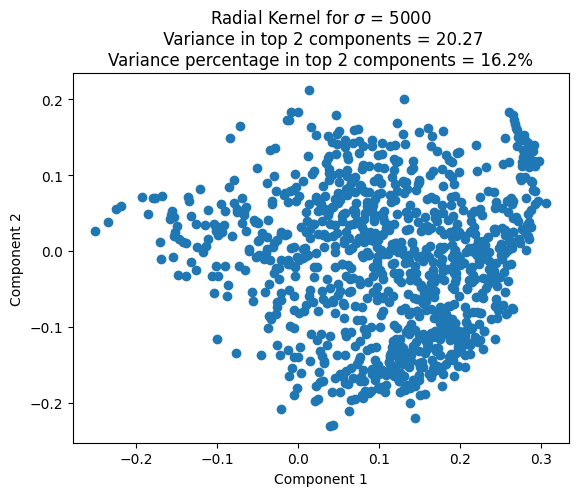

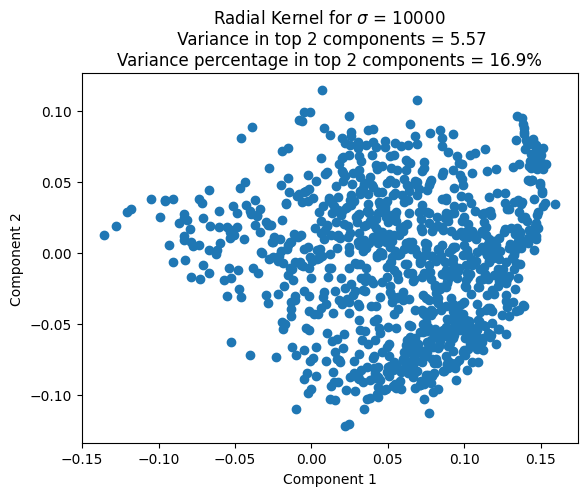

In [170]:
import math
def Kernel2(arr1, arr2, sigma):
    return math.exp(-1.0*np.matmul((arr1 - arr2).T, (arr1 - arr2))/(2*sigma*sigma))
# prev_per = 0.0
# prev_sum = 0.0
for sigma in [1, 100, 1636, 2000, 5000, 10000]:
    kernel_mat2 = np.full((n, n), 0.0, dtype='float64') 
    for i in range(n):
        for j in range(n):
            kernel_mat2[i][j] = math.exp((-1*np.matmul(initial_data[:,i]-initial_data[:, j], initial_data[:,i]-initial_data[:,j], dtype='float64')/(2*(sigma**2))))
    centering_const2 = np.sum(kernel_mat2, dtype='float64')/(n*n)
    kernel_product_mat2 = np.full((n, n), 0.0, dtype='float64')
    #change
    row_sum_mat2 = np.sum(kernel_mat2, axis=1, dtype='float64')/n
    row_sum_mat2 = row_sum_mat2.reshape(-1, 1)
    col_sum_mat2 = np.sum(kernel_mat2, axis=0, dtype = 'float64')/n
    kernel_product_mat2 = kernel_mat2 - row_sum_mat2 - col_sum_mat2 + centering_const2
    eigen_values_kernel2, eigen_vectors_kernel2 = np.linalg.eigh(kernel_product_mat2)
    eigen_values_kernel2 = eigen_values_kernel2[::-1]
    eigen_vectors_kernel2 = eigen_vectors_kernel2[:,::-1]
    eigen_sum = np.sum(eigen_values_kernel2, dtype='float64')
    # print(f'$\sigma$ = {sigma}')
    # if(eigen_values_kernel2[0]+eigen_values_kernel2[1] < prev_sum):
    #     break
    # if((eigen_values_kernel2[0]+eigen_values_kernel2[1])/eigen_sum < prev_per):
    #     break
    # print((eigen_values_kernel2[0]+eigen_values_kernel2[1])/eigen_sum)
    # print(eigen_values_kernel2[0]+eigen_values_kernel2[1])
    # prev_sum = eigen_values_kernel2[0]+eigen_values_kernel2[1]
    # prev_per = (eigen_values_kernel2[0]+eigen_values_kernel2[1])/eigen_sum
    projections2 = np.full((n, 2), 0.0, dtype='float64')
    for i in range(n):
        projections2[i][0] = np.matmul(eigen_vectors_kernel2[:,0], kernel_mat2[i], dtype='float64')/(math.sqrt(eigen_values_kernel2[0]))
        projections2[i][1] = np.matmul(eigen_vectors_kernel2[:,1], kernel_mat2[i], dtype='float64')/(math.sqrt(eigen_values_kernel2[1]))
    plt.scatter(projections2[:,0], projections2[:,1])
    plt.title(f'Radial Kernel for $\sigma$ = {sigma}\n Variance in top 2 components = {eigen_values_kernel2[0]+eigen_values_kernel2[1] :.2f}\nVariance percentage in top 2 components = {((eigen_values_kernel2[0]+eigen_values_kernel2[1])*100/eigen_sum):.1f}%')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()